In [1]:
import sys
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.data_generator import generate_data
from src.clustering import OrdinalClustering, univariate_em, compute_loglikelihood, compute_p_list
from src.bos_model_estimator import estimate_mu_pi_bos as estimate_mu_pi_bos, univariate_em as estimate_mu_pi_bos_em
#_probability_x_given_mu_pi as _probability_x_given_mu_pi_bos
from src.aecm import AECM_BOS, AECM_GOD

%load_ext autoreload
%autoreload 2

## BOS Distribution

[5 5 4 5 3 5 4 5 4 5 3 2 5 4 5 5 3 3 5 5 5 4 4 4 5 5 5 5 4 4 5 5 2 5 5 1 5
 4 5 4 4 5 5 5 5 5 5 5 5 2 5 2 5 5 5 5 5 5 5 1 5 5 3 5 4 5 5 2 5 4 2 1 5 5
 5 5 5 5 5 5 5 5 4 1 5 5 5 4 4 3 5 5 5 5 4 5 4 5 4 5]
True mu: 5, True pi: 0.5928446182250183


  0%|          | 0/5 [00:00<?, ?it/s]

Estimated mu: 5, Estimated pi: 0.6142860537554703, LL: -109.1405130048033 


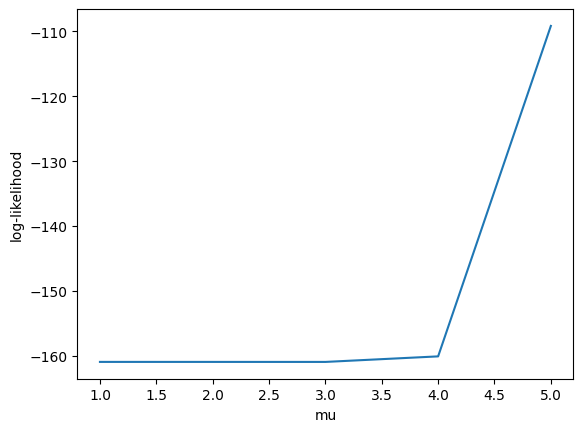

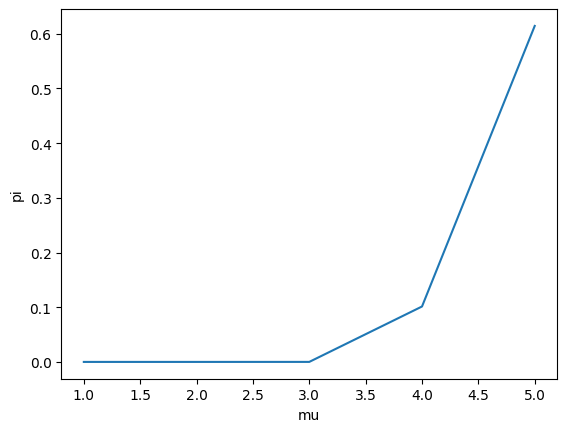

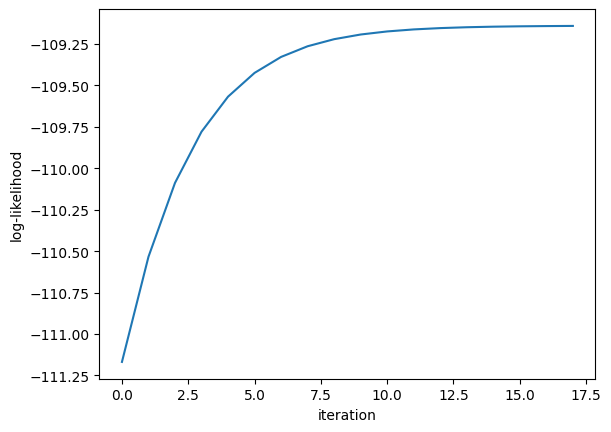

CPU times: user 1min 48s, sys: 1.75 s, total: 1min 50s
Wall time: 1min 51s


In [2]:
%%time
#Univariate
n = 100
m = 5
n_iter = 100
eps = 1e-3

np.random.seed(0)
true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

all_lls = []
ll_list = []
pi_list = []
mu_list = list(range(1, m + 1))
for mu in tqdm(mu_list):
    pl, lls, p_tots = univariate_em(data, m, mu, n_iter, eps)
    pi_list.append(pl[-1])
    ll_list.append(compute_loglikelihood(data, p_tots))
    all_lls.append(lls)

print(
    "Estimated mu: {}, Estimated pi: {}, LL: {} ".format(
        mu_list[np.argmax(ll_list)], pi_list[np.argmax(ll_list)], all_lls[np.argmax(ll_list)][-1]
    )
)

plt.plot(mu_list, ll_list)
plt.xlabel("mu")
plt.ylabel("log-likelihood")
plt.figure()
plt.plot(mu_list, pi_list)
plt.xlabel("mu")
plt.ylabel("pi")
plt.show()

plt.plot(all_lls[np.argmax(ll_list)])
plt.xlabel("iteration")
plt.ylabel("log-likelihood")
plt.show()


In [3]:
%%time
#Univariate: BOS new estimator
m = 5
n = 100

eps = 1e-3
np.random.seed(0)
true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))
mu, pi, ll, _ = estimate_mu_pi_bos(m=m, data=data, epsilon=eps)

print(
    "Estimated mu: {}, Estimated pi: {}, LL: {} ".format(
        mu, pi, ll
    )
)

[5 5 4 5 3 5 4 5 4 5 3 2 5 4 5 5 3 3 5 5 5 4 4 4 5 5 5 5 4 4 5 5 2 5 5 1 5
 4 5 4 4 5 5 5 5 5 5 5 5 2 5 2 5 5 5 5 5 5 5 1 5 5 3 5 4 5 5 2 5 4 2 1 5 5
 5 5 5 5 5 5 5 5 4 1 5 5 5 4 4 3 5 5 5 5 4 5 4 5 4 5]
True mu: 5, True pi: 0.5928446182250183
Estimated mu: 5, Estimated pi: 0.6170117838037215, LL: -109.13880272564882 
CPU times: user 772 ms, sys: 30.9 ms, total: 803 ms
Wall time: 451 ms


In [4]:
%%time
#Univariate: BOS new estimator
m = 20
n = 1_000

eps = 1e-6
np.random.seed(0)
true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
# print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))
mu, pi, ll, _ = estimate_mu_pi_bos(m=m, data=data, epsilon=eps)

print(
    "Estimated mu: {}, Estimated pi: {}, LL: {} ".format(
        mu, pi, ll
    )
)

True mu: 13, True pi: 0.5928446182250183
Estimated mu: 13, Estimated pi: 0.5982265445236181, LL: -2237.1804014200807 
CPU times: user 358 ms, sys: 77.5 ms, total: 435 ms
Wall time: 376 ms


True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.38791074 0.66974604 0.93553907]
 [0.84631092 0.31327352 0.52454816]
 [0.44345289 0.22957721 0.53441391]]
Iteration 0
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Current alpha: [0.33333333 0.33333333 0.33333333]
Log-likelihood: -359.8140276542359
Iteration 1
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.75306383 0.36078489 0.83389496]
 [0.74244983 0.65416708 0.37985598]
 [0.00936346 0.00825596 0.58513103]]
Current alpha: [0.28308149 0.11821236 0.59870615]
Log-likelihood: -285.60680169935665
Iteration 2
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.59843738 0.36278324 0.82925337]
 [0.82581539 0.68170148 0.25272645]
 [0.11318413 0.01249338 0.7520116 ]]
Current alpha: [0.2384502  0.11643854 0.645

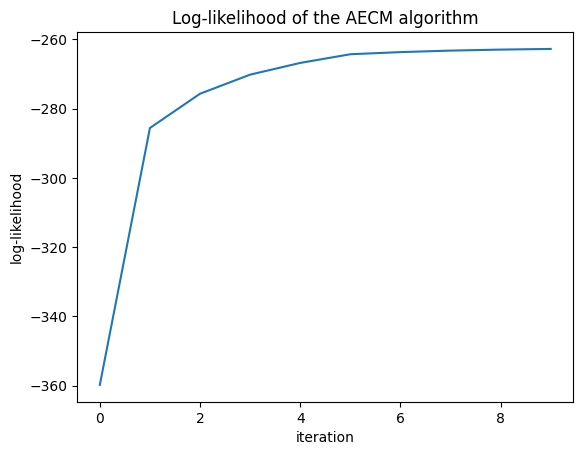

CPU times: user 33.7 s, sys: 86 ms, total: 33.8 s
Wall time: 33.7 s


In [5]:
%%time
# Multivariate
n = 100

d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.38791074 0.66974604 0.93553907]
 [0.84631092 0.31327352 0.52454816]
 [0.44345289 0.22957721 0.53441391]]
Random initialization
--Initial E step--
--Init log-likelihood--
--------------------
Initial mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Initial pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Initial log likelihood: -359.8140276542359
Likelihoods: [-359.8140276542359]
--M step 1--
--Internal estimation 1--
--E step 1
--Update log-likelihood 1--
Iteration 1
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [2 1 1]]
Current pi: [[0.74211248 0.33470508 0.85733882]
 [0.7914952  0.70919067 0.29080933]
 [0.54183813 0.25788752 0.76406036]]
Current alpha: [0.28308149 0.11821236 0.59870615]
Log likelihood: -266.14859872097844
Likelihoods: [-359.8140276542359, -266.14859872097844]
--M step 2--
--Internal estimation 2--
--E step 2
--Update 

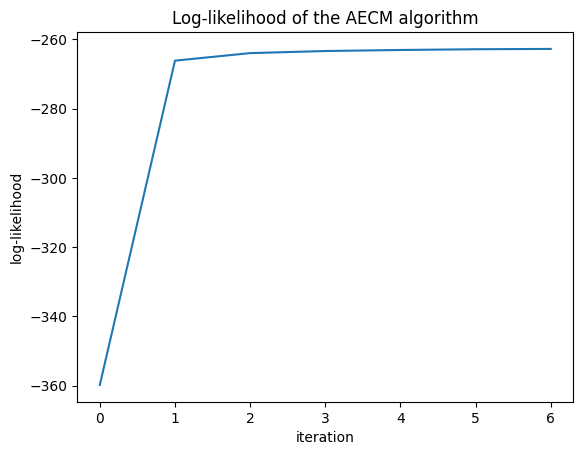

CPU times: user 405 ms, sys: 7.17 ms, total: 412 ms
Wall time: 136 ms


In [6]:
%%time
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

# clustering = AECM_BOS(nb_clusters=n_clusters, n_iter=n_iter, eps=eps, silent=False)
clustering = AECM_BOS(nb_clusters=n_clusters,
                      nb_features=d,
                      ms=m,
                      data=data[0],
                      verbose=True)
                      
ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter)

labels = clustering.labels

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        clustering.alphas, clustering.mus, clustering.pis
    )
)
alpha_hat, mu_hat, pi_hat = clustering.alphas, clustering.mus, clustering.pis

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.24615675770212886
True mu: [2 1 1]
Estimated mu: [1 2 1]
True pi: [0.38791074 0.66974604 0.93553907]
Estimated pi: [0.66803841 0.54183813 0.59122085]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.09424543957948427
True mu: [2 2 1]
Estimated mu: [2 2 3]
True pi: [0.84631092 0.31327352 0.52454816]
Estimated pi: [0.9122085  0.84636488 0.25788752]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.6595978027183872
True mu: [1 2 1]
Estimated mu: [2 1 1]
True pi: [0.44345289 0.22957721 0.53441391]
Estimated pi: [0.52400549 0.33470508 0.81344307]


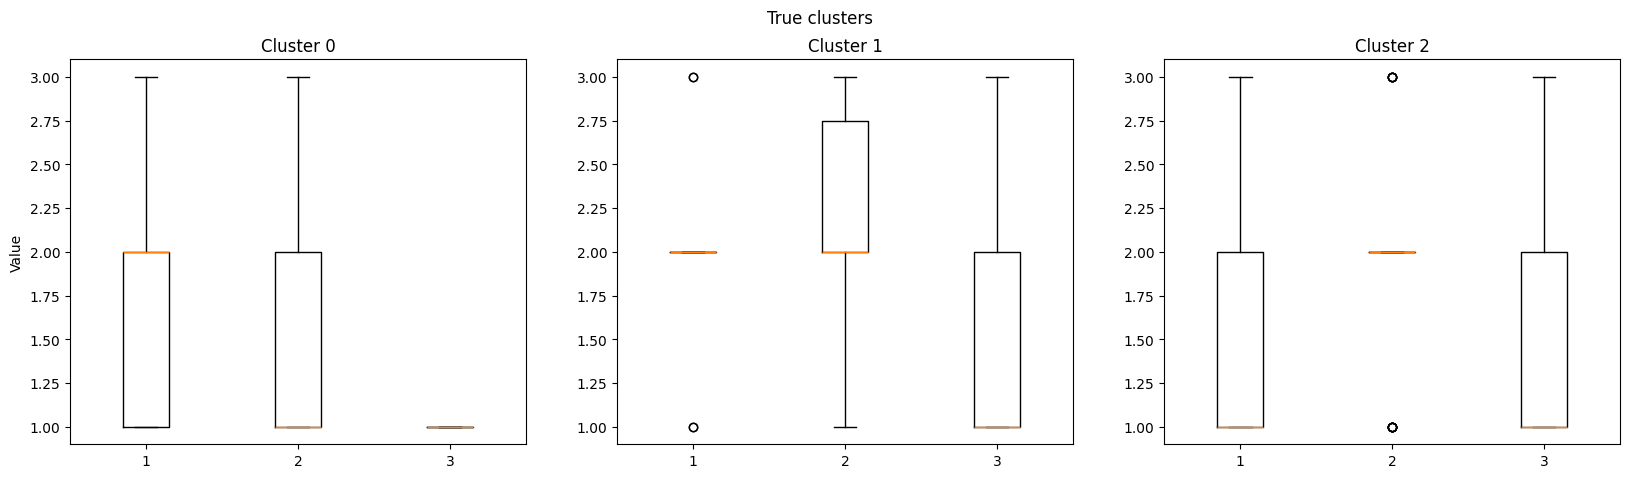

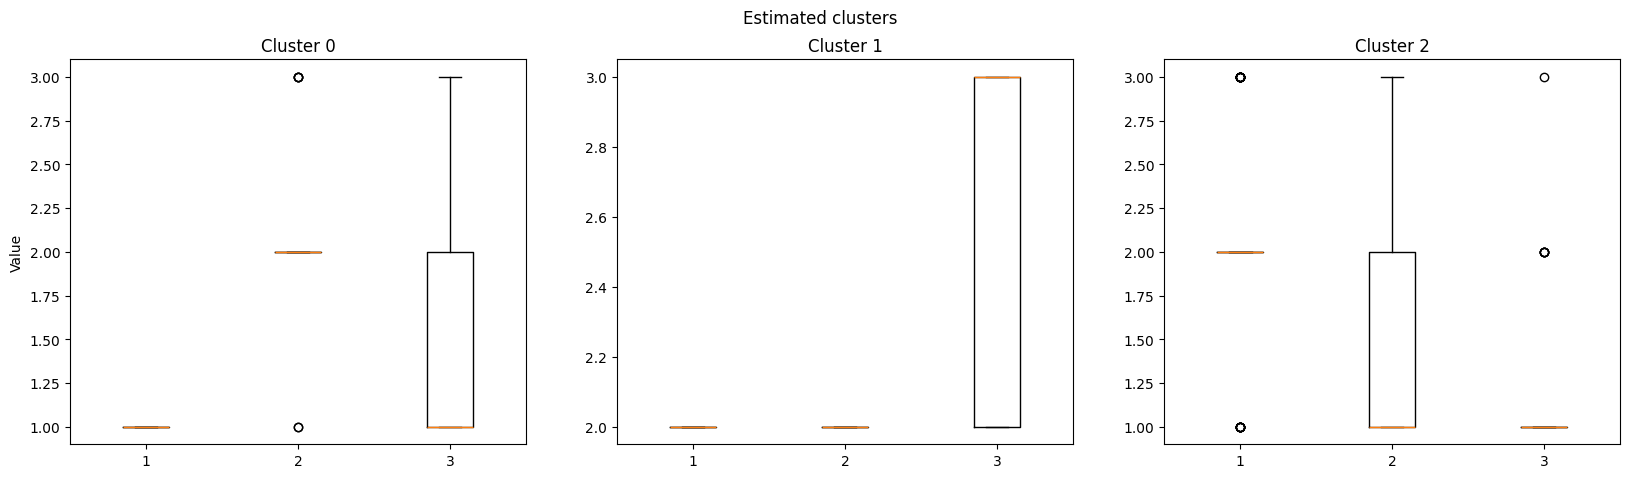

In [7]:
import pandas as pd

#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

## Experiments for the BOS model

In [8]:
import time
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10
eps = 1e-1

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

inits = ["random", "kmeans"]

scores = defaultdict(list)

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = np.random.random((nc, dim))
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, seed=0)

                    start_time = time.time()
                    clustering = OrdinalClustering(nc, model="bos", init=init, n_iter=n_iter, eps=eps, seed=0)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    run_time = time.time() - start_time

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["run_time"].append(run_time)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")


scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_bos.csv", index=False)

1/32 done in 4.48s
Estimated time left: 138.88s
2/32 done in 8.98s
Estimated time left: 134.68s
3/32 done in 45.00s
Estimated time left: 435.00s
4/32 done in 152.14s
Estimated time left: 1064.98s
5/32 done in 163.66s
Estimated time left: 883.78s
6/32 done in 174.68s
Estimated time left: 756.96s
7/32 done in 289.65s
Estimated time left: 1034.46s
8/32 done in 462.23s
Estimated time left: 1386.70s
9/32 done in 465.38s
Estimated time left: 1189.31s
10/32 done in 471.12s
Estimated time left: 1036.47s
11/32 done in 609.66s
Estimated time left: 1163.90s
12/32 done in 761.66s
Estimated time left: 1269.44s
13/32 done in 778.81s
Estimated time left: 1138.26s
14/32 done in 793.73s
Estimated time left: 1020.51s
15/32 done in 1098.28s
Estimated time left: 1244.71s
16/32 done in 1413.50s
Estimated time left: 1413.51s
17/32 done in 1413.79s
Estimated time left: 1247.46s
18/32 done in 1414.33s
Estimated time left: 1100.04s
19/32 done in 1432.17s
Estimated time left: 979.91s
20/32 done in 1447.90s
Esti

In [9]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    "Runtime (s)",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_bos", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_bos}
\begin{tabular}{lllllrrrr}
\toprule
 &  &  &  &  & Runtime (s) & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.518 & 0.143 & 0.167 & 0.251 \\
 &  &  &  & 3 & 15.723 & 0.161 & 0.667 & 0.122 \\
\cline{4-9}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.977 & 0.133 & 0.200 & 0.243 \\
 &  &  &  & 3 & 26.190 & 0.120 & 0.333 & 0.101 \\
\cline{3-9} \cline{4-9}
 &  & \multirow[t]{4}{

Runtime (s)  $\Delta \alpha$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                 
kmeans 50  3              3   2              0.518451         0.143190   
                              3             15.723005         0.160921   
                          5   2              0.976918         0.132746   
                              3             26.190229         0.120198   
           5              3   2              0.289067         0.097886   
                              3             20.428017         0.143373   
                          5   2              1.514572         0.098956   
                              3             45.853282         0.116063   
       250 3              3   2              4.488808         0.111190   
                              3            107.128218         0.011582   
                          5   2             11.006066         0.132751   
                              3            172.562782         0.052025   
           5              3   2              5.733843         0.149301   
                              3            151.989585         0.310841   
                          5   2             14.906443         0.137671   
                              3            315.207142         0.173477   
random 50  3              3   2              0.259225         0.114173   
                              3             17.784479         0.082156   
                          5   2              1.003034         0.026010   
                              3             21.472770         0.040014   
           5              3   2              0.305131         0.059383   
                              3             19.521786         0.068593   
                          5   2              1.577048         0.095728   
                              3             36.665482         0.068416   
       250 3              3   2              4.470225         0.092989   
                              3             36.007946         0.027850   
                          5   2             11.507143         0.032100   
                              3            114.945319         0.020608   
           5              3   2              3.138800         0.041488   
                              3            138.525141         0.065417   
                          5   2             17.131904         0.041409   
                              3            304.525953         0.018834   

                                          $\Delta \mu$  $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                              
kmeans 50  3              3   2               0.166667      0.251259  
                              3               0.666667      0.122356  
                          5   2               0.200000      0.243337  
                              3               0.333333      0.101406  
           5              3   2               0.666667      0.335781  
                              3               0.777778      0.356110  
                          5   2               0.400000      0.209700  
                              3               0.200000      0.095892  
       250 3              3   2               0.166667      0.347375  
                              3               0.444444      0.205788  
                          5   2               0.200000      0.198169  
                              3               0.266667      0.108291  
           5              3   2               0.666667      0.423353  
                              3               0.444444      0.246881  
                          5   2               0.400000      0.295945  
                              3               0.466667      0.135300  
random 50  3              3   2               0.166667      0.080730  
                              3               0.222222      0.107542  
                          5   2               0.000000      0.074389  
                              3   

In [10]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

eps = 1e-3
n_iter = 100

ns = [250, 50]


n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

inits = ["random", "kmeans"]

scores = defaultdict(list)

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = np.random.random((nc, dim))
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, seed=0)

                    start_time = time.time()
                    # clustering = OrdinalClustering(nc, model="bos", init=init, n_iter=n_iter, eps=eps)
                    clustering = AECM_BOS(nb_clusters=nc,
                                          nb_features=dim,
                                          ms=m,
                                          data=data[0],
                                          verbose=False,
                                          seed=0
                                          )

                    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization=init)
                    run_time = time.time() - start_time
                    alpha_hat = clustering.alphas
                    mu_hat = clustering.mus
                    pi_hat = clustering.pis
                    labels = clustering.labels
                    
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["run_time"].append(run_time)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_bos_v2.csv", index=False)

1/32 done in 0.05s
Estimated time left: 1.43s
2/32 done in 0.06s
Estimated time left: 0.97s
3/32 done in 0.13s
Estimated time left: 1.24s
4/32 done in 0.20s
Estimated time left: 1.39s
5/32 done in 0.24s
Estimated time left: 1.28s
6/32 done in 0.28s
Estimated time left: 1.22s
7/32 done in 0.35s
Estimated time left: 1.25s
8/32 done in 0.59s
Estimated time left: 1.77s
9/32 done in 0.66s
Estimated time left: 1.68s
10/32 done in 0.70s
Estimated time left: 1.55s
11/32 done in 0.88s
Estimated time left: 1.68s
12/32 done in 1.05s
Estimated time left: 1.75s
13/32 done in 1.20s
Estimated time left: 1.76s
14/32 done in 1.58s
Estimated time left: 2.04s
15/32 done in 2.10s
Estimated time left: 2.38s
16/32 done in 3.67s
Estimated time left: 3.67s
17/32 done in 3.72s
Estimated time left: 3.29s
18/32 done in 3.75s
Estimated time left: 2.92s
19/32 done in 3.82s
Estimated time left: 2.61s
20/32 done in 3.97s
Estimated time left: 2.38s
21/32 done in 4.02s
Estimated time left: 2.10s
22/32 done in 4.19s
Es

In [11]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    "Runtime (s)",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_bos", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_bos}
\begin{tabular}{lllllrrrr}
\toprule
 &  &  &  &  & Runtime (s) & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.020 & 0.139 & 0.167 & 0.229 \\
 &  &  &  & 3 & 0.149 & 0.198 & 0.667 & 0.137 \\
\cline{4-9}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.171 & 0.090 & 0.200 & 0.158 \\
 &  &  &  & 3 & 0.103 & 0.135 & 0.133 & 0.070 \\
\cline{3-9} \cline{4-9}
 &  & \multirow[t]{4}{*}

Runtime (s)  $\Delta \alpha$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                 
kmeans 50  3              3   2              0.019651         0.139418   
                              3              0.149493         0.198084   
                          5   2              0.170516         0.089957   
                              3              0.103151         0.134799   
           5              3   2              0.070156         0.090359   
                              3              0.213018         0.134610   
                          5   2              0.120234         0.073078   
                              3              0.376374         0.114214   
       250 3              3   2              0.008666         0.115176   
                              3              0.057580         0.015894   
                          5   2              0.030031         0.089114   
                              3              0.214987         0.117970   
           5              3   2              0.035208         0.151496   
                              3              0.147069         0.273696   
                          5   2              0.354908         0.077483   
                              3              1.547134         0.177400   
random 50  3              3   2              0.045522         0.115032   
                              3              0.069301         0.106983   
                          5   2              0.037414         0.035597   
                              3              0.052872         0.040018   
           5              3   2              0.022495         0.053117   
                              3              0.175969         0.057372   
                          5   2              0.062102         0.089039   
                              3              0.179985         0.072046   
       250 3              3   2              0.032264         0.100048   
                              3              0.051060         0.047138   
                          5   2              0.021086         0.031688   
                              3              0.046509         0.020315   
           5              3   2              0.053334         0.042517   
                              3              0.150879         0.086203   
                          5   2              0.125507         0.041776   
                              3              0.410310         0.028549   

                                          $\Delta \mu$  $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                              
kmeans 50  3              3   2               0.166667      0.229311  
                              3               0.666667      0.136898  
                          5   2               0.200000      0.157534  
                              3               0.133333      0.069706  
           5              3   2               0.666667      0.344964  
                              3               0.666667      0.292502  
                          5   2               0.300000      0.204458  
                              3               0.466667      0.159234  
       250 3              3   2               0.166667      0.333367  
                              3               0.444444      0.201929  
                          5   2               0.200000      0.192330  
                              3               0.266667      0.109120  
           5              3   2               0.666667      0.386773  
                              3               0.555556      0.199384  
                          5   2               0.400000      0.197600  
                              3               0.466667      0.138004  
random 50  3              3   2               0.166667      0.169787  
                              3               0.222222      0.142638  
                          5   2               0.100000      0.074404  
                              3   

## GOD Model

In [12]:
from src.god_model_generator import god_model_sample
from src.god_model_estimator import estimate_mu_pi_god as estimate_mu_pi_god

n = 1000
m = 4
n_iter = 10000
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = (np.random.random() + 1) / 2

data = god_model_sample(m, true_mu, true_pi, n_sample=n, seed=0)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

mu_hat, pi_hat, ll, _ = estimate_mu_pi_god(m, data)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_hat, pi_hat
    )
)

print(ll)

True mu: 2, True pi: 0.5376795345416702
Estimated mu: 2, Estimated pi: 0.5165776964368864
-1362.9775336779242


True alpha: [0.25 0.25 0.25 0.25], True mu: [[4 5 1 2]
 [4 1 1 2]
 [5 5 2 3]
 [5 3 5 4]], True pi: [[0.72172645 0.61478861 0.76720695 0.95698101]
 [0.7286024  0.71534928 0.96956389 0.88919462]
 [0.85798526 0.90137875 0.5464004  0.75907627]
 [0.93251013 0.91457345 0.91480168 0.63652499]]
Iteration 0
--------------------
Current mu: [[5 1 4 4]
 [4 2 4 3]
 [5 1 1 5]
 [3 2 1 2]]
Current pi: [[0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832]]
Current alpha: [0.25 0.25 0.25 0.25]
Log-likelihood: -7178.137141256473
Iteration 1
--------------------
Current mu: [[5 5 5 1]
 [5 3 5 3]
 [5 3 1 2]
 [4 5 1 2]]
Current pi: [[0.93388748 0.78524331 0.58149738 0.58314416]
 [0.8099572  0.74411174 0.72202958 0.81364105]
 [0.77914808 0.64138504 0.57249653 0.77731943]
 [0.68227929 0.58236579 0.86650671 0.83677943]]
Current alpha: [0.07943503 0.17658159 0.39407381 0.3499095

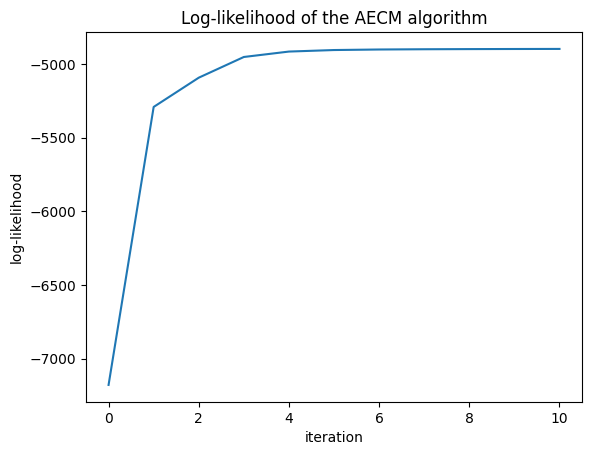

In [13]:
# Multivariate : GOD old
n = 1000
d = 4
n_clusters = 4
n_cat = 5

n_iter = 11
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = (np.random.random((n_clusters, d)) + 1)/2
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, seed=0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, model="god", init="random", n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

True alpha: [0.25 0.25 0.25 0.25], True mu: [[4 5 1 2]
 [4 1 1 2]
 [5 5 2 3]
 [5 3 5 4]], True pi: [[0.72172645 0.61478861 0.76720695 0.95698101]
 [0.7286024  0.71534928 0.96956389 0.88919462]
 [0.85798526 0.90137875 0.5464004  0.75907627]
 [0.93251013 0.91457345 0.91480168 0.63652499]]
Random initialization
--Initial E step--
--Init log-likelihood--
--------------------
Initial mu: [[5 1 4 4]
 [4 2 4 3]
 [5 1 1 5]
 [3 2 1 2]]
Initial pi: [[0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]
 [0.63992102 0.14335329 0.94466892 0.52184832]]
Initial log likelihood: -7178.137141256473
Likelihoods: [-7178.137141256473]
--M step 1--
--Internal estimation 1--
--E step 1
--Update log-likelihood 1--
Iteration 1
--------------------
Current mu: [[5 5 5 1]
 [5 3 5 3]
 [5 3 1 2]
 [4 5 1 2]]
Current pi: [[0.93392909 0.78520034 0.58164905 0.58296   ]
 [0.80999331 0.74417802 0.72214498 0.81367303]
 [0.77901469 0.64

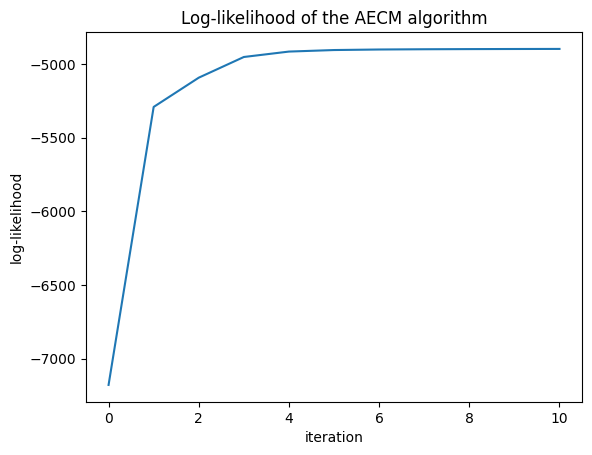

In [14]:
# Multivariate : GOD new
n = 1_000
d = 4
n_clusters = 4
n_cat = 5

n_iter = 10
# n_iter = 2
eps = 1e-1

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = (np.random.random((n_clusters, d)) + 1)/2
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, seed=0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

# clustering = OrdinalClustering(n_clusters, model="god", init="random", n_iter=n_iter, eps=eps, silent=False)
clustering = AECM_GOD(nb_clusters=n_clusters,
                        nb_features=d,
                        ms=m,
                        data=data[0],
                        verbose=True)
ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter)


labels = clustering.labels

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        clustering.alphas, clustering.mus, clustering.pis
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.25
Estimated alpha: 0.16159682817644322
True mu: [4 5 1 2]
Estimated mu: [5 5 2 3]
True pi: [0.72172645 0.61478861 0.76720695 0.95698101]
Estimated pi: [0.85154482 0.92071927 0.56833669 0.84194785]
Cluster 1
True alpha: 0.25
Estimated alpha: 0.24365577962812549
True mu: [4 1 1 2]
Estimated mu: [5 3 5 4]
True pi: [0.7286024  0.71534928 0.96956389 0.88919462]
Estimated pi: [0.94562789 0.92923968 0.89019166 0.60814525]
Cluster 2
True alpha: 0.25
Estimated alpha: 0.15363688034567177
True mu: [5 5 2 3]
Estimated mu: [5 5 1 2]
True pi: [0.85798526 0.90137875 0.5464004  0.75907627]
Estimated pi: [0.7087693  0.79278854 0.5734729  0.80663552]
Cluster 3
True alpha: 0.25
Estimated alpha: 0.4411105118497584
True mu: [5 3 5 4]
Estimated mu: [4 1 1 2]
True pi: [0.93251013 0.91457345 0.91480168 0.63652499]
Estimated pi: [0.74683648 0.60287681 0.92546451 0.92025332]


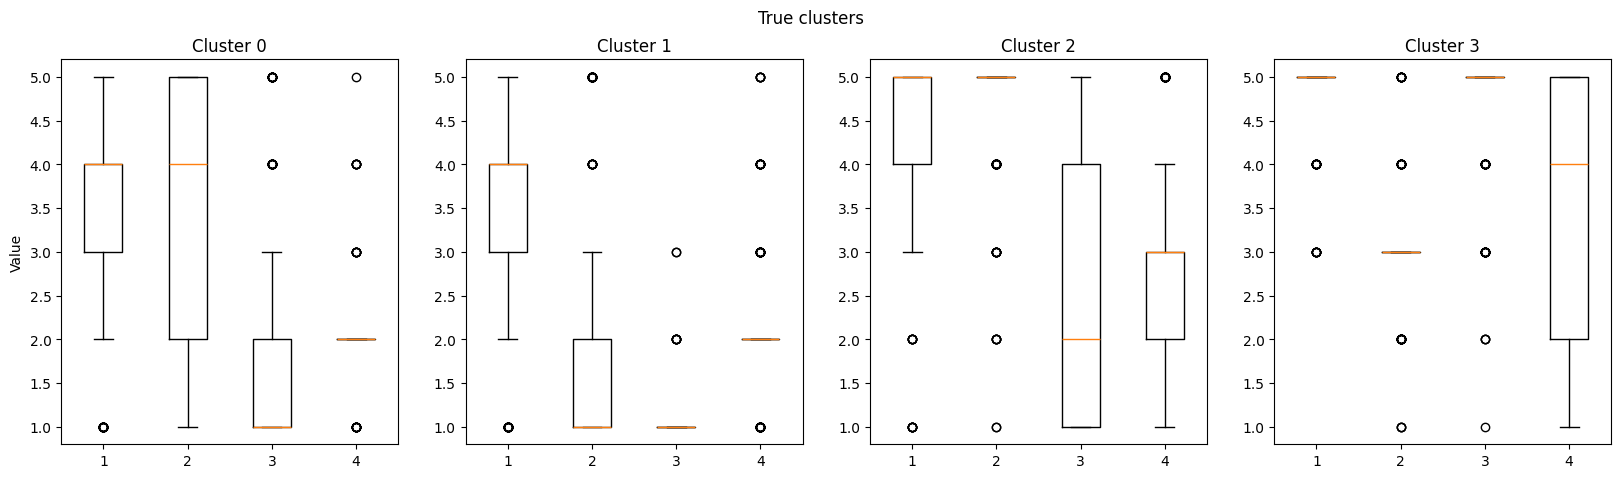

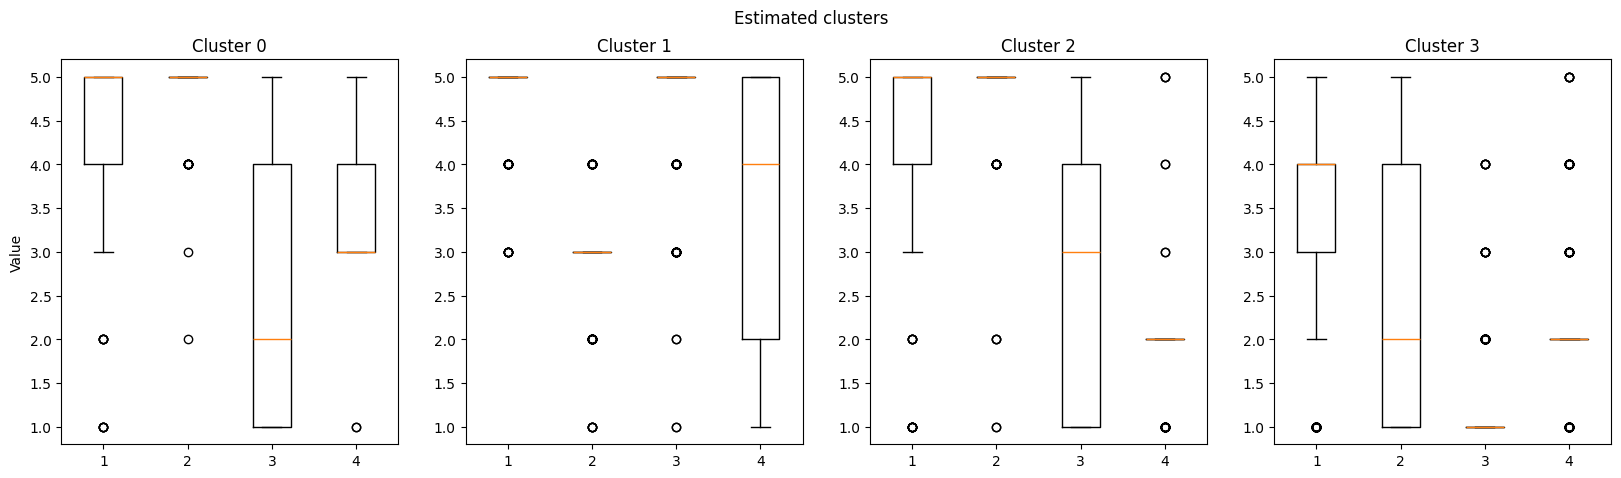

In [15]:
#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

## Experiments for the GOD model

In [16]:

# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10
eps = 1e-1

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

inits = ["random", "kmeans"]

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = (np.random.random((nc, dim)) + 1)/2 + 1e-3
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0, model="god")

                    start_time = time.time()
                    clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    run_time = time.time() - start_time

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["run_time"].append(run_time)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god.csv", index=False)

1/32 done in 0.19s
Estimated time left: 5.84s
2/32 done in 0.52s
Estimated time left: 7.92s
3/32 done in 1.22s
Estimated time left: 11.84s
4/32 done in 1.91s
Estimated time left: 13.35s
5/32 done in 2.63s
Estimated time left: 14.20s
6/32 done in 3.31s
Estimated time left: 14.34s
7/32 done in 4.16s
Estimated time left: 14.86s
8/32 done in 4.78s
Estimated time left: 14.34s
9/32 done in 5.24s
Estimated time left: 13.40s
10/32 done in 5.42s
Estimated time left: 11.93s
11/32 done in 6.30s
Estimated time left: 12.03s
12/32 done in 7.10s
Estimated time left: 11.83s
13/32 done in 7.89s
Estimated time left: 11.53s
14/32 done in 8.50s
Estimated time left: 10.93s
15/32 done in 9.85s
Estimated time left: 11.17s
16/32 done in 11.19s
Estimated time left: 11.19s
17/32 done in 11.28s
Estimated time left: 9.95s
18/32 done in 11.30s
Estimated time left: 8.79s
19/32 done in 11.40s
Estimated time left: 7.80s
20/32 done in 11.55s
Estimated time left: 6.93s
21/32 done in 11.76s
Estimated time left: 6.16s
22

In [17]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    "Runtime (s)",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_god", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_god}
\begin{tabular}{lllllrrrr}
\toprule
 &  &  &  &  & Runtime (s) & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.016 & 0.146 & 0.167 & 0.155 \\
 &  &  &  & 3 & 0.143 & 0.082 & 0.444 & 0.084 \\
\cline{4-9}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.093 & 0.096 & 0.300 & 0.074 \\
 &  &  &  & 3 & 0.381 & 0.088 & 0.333 & 0.057 \\
\cline{3-9} \cline{4-9}
 &  & \multirow[t]{4}{*}{5} & \

Runtime (s)  $\Delta \alpha$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                 
kmeans 50  3              3   2              0.016230         0.145979   
                              3              0.143382         0.081914   
                          5   2              0.093396         0.095991   
                              3              0.381080         0.088148   
           5              3   2              0.026567         0.127968   
                              3              0.443716         0.214639   
                          5   2              0.375655         0.134866   
                              3              0.645816         0.213730   
       250 3              3   2              0.325246         0.272696   
                              3              0.672355         0.109286   
                          5   2              0.653915         0.102741   
                              3              0.609313         0.045358   
           5              3   2              0.171445         0.074817   
                              3              0.794158         0.191979   
                          5   2              0.595563         0.078952   
                              3              1.324714         0.154731   
random 50  3              3   2              0.086284         0.056986   
                              3              0.099899         0.140546   
                          5   2              0.213153         0.039472   
                              3              0.281365         0.045676   
           5              3   2              0.046082         0.102595   
                              3              0.410981         0.152823   
                          5   2              0.374565         0.056628   
                              3              0.676669         0.115370   
       250 3              3   2              0.175612         0.039088   
                              3              0.679088         0.156742   
                          5   2              0.699245         0.030561   
                              3              0.832630         0.086608   
           5              3   2              0.455920         0.054804   
                              3              0.871337         0.146494   
                          5   2              0.778962         0.067480   
                              3              1.344990         0.121225   

                                          $\Delta \mu$  $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                              
kmeans 50  3              3   2               0.166667      0.154747  
                              3               0.444444      0.083904  
                          5   2               0.300000      0.074431  
                              3               0.333333      0.056527  
           5              3   2               0.666667      0.210839  
                              3               0.777778      0.120766  
                          5   2               0.300000      0.135550  
                              3               0.266667      0.074492  
       250 3              3   2               0.333333      0.102847  
                              3               0.555556      0.083895  
                          5   2               0.200000      0.082350  
                              3               0.266667      0.052398  
           5              3   2               0.666667      0.184779  
                              3               0.444444      0.177005  
                          5   2               0.400000      0.147149  
                              3               0.266667      0.048500  
random 50  3              3   2               0.166667      0.092138  
                              3               0.333333      0.058604  
                          5   2               0.100000      0.051541  
                              3   

In [18]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [250, 50]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

inits = ["random", "kmeans"]

to_do = len(ns) * len(n_clusters) * len(d) * len(n_cats) * len(inits)
dones = 0
starting_time = perf_counter()

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = (np.random.random((nc, dim)) + 1)/2 + 1e-3
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0, model="god")

                    # clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)
                    start_time = time.time()
                    clustering = AECM_GOD(nb_clusters=nc,
                                          nb_features=dim,
                                          ms=m,
                                          data=data[0],
                                          verbose=False)

                    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
                    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization=init)
                    run_time = time.time() - start_time
                    alpha_hat = clustering.alphas
                    mu_hat = clustering.mus
                    pi_hat = clustering.pis
                    labels = clustering.labels

                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["run_time"].append(run_time)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

                    dones += 1
                    print(f"{dones}/{to_do} done in {perf_counter() - starting_time:.2f}s")
                    print(f"Estimated time left: {(to_do - dones) * (perf_counter() - starting_time) / dones:.2f}s")

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god_v2.csv", index=False)

1/32 done in 0.03s
Estimated time left: 0.98s
2/32 done in 0.08s
Estimated time left: 1.14s
3/32 done in 0.15s
Estimated time left: 1.43s
4/32 done in 0.23s
Estimated time left: 1.58s
5/32 done in 0.39s
Estimated time left: 2.13s
6/32 done in 0.51s
Estimated time left: 2.19s
7/32 done in 0.63s
Estimated time left: 2.24s
8/32 done in 0.75s
Estimated time left: 2.24s
9/32 done in 0.82s
Estimated time left: 2.10s
10/32 done in 0.89s
Estimated time left: 1.96s
11/32 done in 1.02s
Estimated time left: 1.95s
12/32 done in 1.19s
Estimated time left: 1.98s
13/32 done in 1.31s
Estimated time left: 1.93s
14/32 done in 1.41s
Estimated time left: 1.82s
15/32 done in 1.70s
Estimated time left: 1.93s
16/32 done in 2.07s
Estimated time left: 2.07s
17/32 done in 2.11s
Estimated time left: 1.86s
18/32 done in 2.12s
Estimated time left: 1.65s
19/32 done in 2.15s
Estimated time left: 1.47s
20/32 done in 2.20s
Estimated time left: 1.32s
21/32 done in 2.25s
Estimated time left: 1.18s
22/32 done in 2.30s
Es

/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:466: RuntimeWarning: divide by zero encountered in scalar divide
  return pi ** (m - 1) * evaluate_polynomial(u[mu - 1, x - 1], (1 - pi) / pi)


In [19]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    "Runtime (s)",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_god", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_god}
\begin{tabular}{lllllrrrr}
\toprule
 &  &  &  &  & Runtime (s) & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.007 & 0.146 & 0.167 & 0.155 \\
 &  &  &  & 3 & 0.048 & 0.082 & 0.444 & 0.084 \\
\cline{4-9}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.040 & 0.096 & 0.300 & 0.074 \\
 &  &  &  & 3 & 0.132 & 0.088 & 0.333 & 0.057 \\
\cline{3-9} \cline{4-9}
 &  & \multirow[t]{4}{*}{5} & \

Runtime (s)  $\Delta \alpha$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                 
kmeans 50  3              3   2              0.006743         0.145979   
                              3              0.048473         0.081911   
                          5   2              0.040277         0.096068   
                              3              0.131952         0.088135   
           5              3   2              0.019566         0.127968   
                              3              0.075244         0.214684   
                          5   2              0.126892         0.134706   
                              3              0.013381         0.187991   
       250 3              3   2              0.023812         0.272664   
                              3              0.069495         0.109295   
                          5   2              0.092574         0.102222   
                              3              0.100411         0.045397   
           5              3   2              0.063197         0.074790   
                              3              0.148784         0.191986   
                          5   2              0.074999         0.078940   
                              3              0.337075         0.154679   
random 50  3              3   2              0.034347         0.057052   
                              3              0.032658         0.140544   
                          5   2              0.047548         0.039484   
                              3              0.064911         0.045700   
           5              3   2              0.015602         0.102598   
                              3              0.114927         0.152794   
                          5   2              0.099833         0.056628   
                              3              0.207823         0.161602   
       250 3              3   2              0.017452         0.039051   
                              3              0.064999         0.156737   
                          5   2              0.150430         0.030576   
                              3              0.101595         0.086635   
           5              3   2              0.060225         0.054716   
                              3              0.116376         0.146495   
                          5   2              0.102514         0.067474   
                              3              0.273550         0.121292   

                                          $\Delta \mu$  $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                              
kmeans 50  3              3   2               0.166667      0.154558  
                              3               0.444444      0.083932  
                          5   2               0.300000      0.074441  
                              3               0.333333      0.056527  
           5              3   2               0.666667      0.210526  
                              3               0.777778      0.120717  
                          5   2               0.300000      0.135178  
                              3               0.400000      0.139744  
       250 3              3   2               0.333333      0.102731  
                              3               0.555556      0.083878  
                          5   2               0.200000      0.082164  
                              3               0.266667      0.052374  
           5              3   2               0.666667      0.184510  
                              3               0.444444      0.176979  
                          5   2               0.400000      0.147061  
                              3               0.266667      0.048471  
random 50  3              3   2               0.166667      0.092125  
                              3               0.333333      0.058617  
                          5   2               0.100000      0.051501  
                              3   

## Choosing the correct number of clusters

### BOS

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]


  0%|          | 0/4 [00:00<?, ?it/s]

Estimated alpha: [0.77502843 0.22497157], Estimated mu: [[2 1 1]
 [1 2 1]], Estimated pi: [[0.71321424 0.27602583 0.97888148]
 [0.62186685 0.71243268 0.08382227]]
LL: -225.26722597481492
BIC: -241.38532162577323
Estimated alpha: [0.21763785 0.12215396 0.66020819], Estimated mu: [[1 2 1]
 [2 2 1]
 [2 1 1]], Estimated pi: [[0.80178891 0.7623055  0.42170427]
 [0.9050356  0.62136785 0.76127505]
 [0.72379254 0.35171556 0.9531913 ]]
LL: -221.95832308156446
BIC: -247.28675910449897
Estimated alpha: [0.26030842 0.15413949 0.56431837 0.02123372], Estimated mu: [[2 2 1]
 [1 2 1]
 [2 1 1]
 [3 1 3]], Estimated pi: [[0.63101004 0.60266347 0.84589423]
 [0.8364758  0.80367683 0.04799701]
 [0.71235401 0.44271192 0.99555289]
 [0.09174973 0.35635759 0.053485  ]]
LL: -222.61046113624076
BIC: -257.14923753115147
Estimated alpha: [0.29383398 0.08201926 0.49867724 0.07029092 0.0551786 ], Estimated mu: [[2 2 1]
 [1 2 1]
 [2 1 1]
 [2 1 1]
 [2 3 3]], Estimated pi: [[0.396525   0.77461439 0.79067708]
 [0.764683

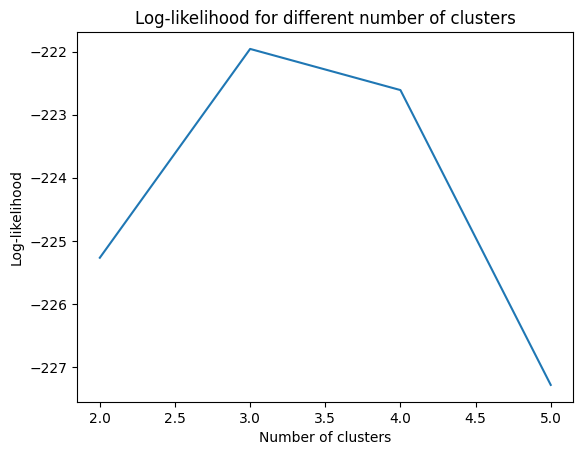

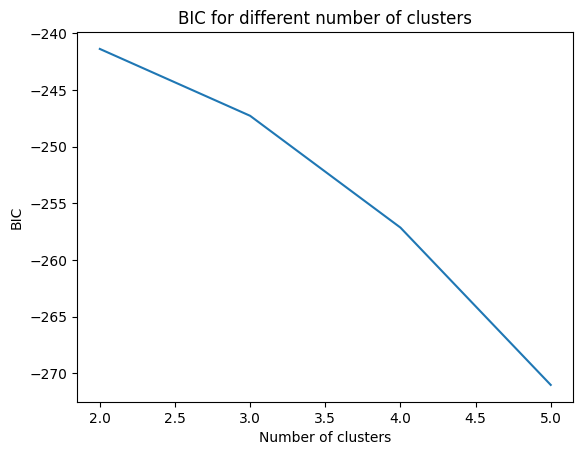

In [20]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="bos")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in tqdm(range(2, 6)):
    clustering = OrdinalClustering(n_clusters, model="bos", init="random", n_iter=n_iter, eps=eps, silent=True)

    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

    labels = clustering.labels_

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            alpha_hat, mu_hat, pi_hat
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]


  0%|          | 0/4 [00:00<?, ?it/s]

Estimated alpha: [0.60200617 0.39799383], Estimated mu: [[2 2 1]
 [2 1 1]], Estimated pi: [[0.69821674 0.25788752 0.95610425]
 [0.23593964 0.25788752 0.59122085]]
LL: -240.69108864386877
BIC: -256.8091842948271
Estimated alpha: [0.20712982 0.10238935 0.69048083], Estimated mu: [[1 2 1]
 [2 2 1]
 [2 1 1]], Estimated pi: [[0.89026063 0.76406036 0.40877915]
 [0.89026063 0.56927298 0.6351166 ]
 [0.74211248 0.33196159 0.95610425]]
LL: -221.9850679776411
BIC: -247.31350400057562
Estimated alpha: [0.2314705  0.19319055 0.34427245 0.2310665 ], Estimated mu: [[1 2 1]
 [2 2 1]
 [2 1 1]
 [2 1 1]], Estimated pi: [[0.7914952  0.76406036 0.43072702]
 [0.9122085  0.59122085 0.81344307]
 [0.81344307 0.14266118 0.95610425]
 [0.54183813 0.89026063 0.95610425]]
LL: -220.97326949701196
BIC: -255.51204589192264
Estimated alpha: [0.24457064 0.12428343 0.18997697 0.09905668 0.34211228], Estimated mu: [[1 2 1]
 [2 1 1]
 [2 2 1]
 [2 1 1]
 [2 1 1]], Estimated pi: [[0.74211248 0.74211248 0.40877915]
 [0.74211248

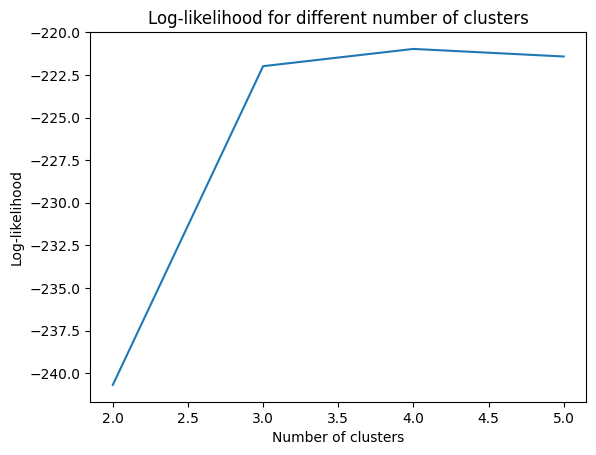

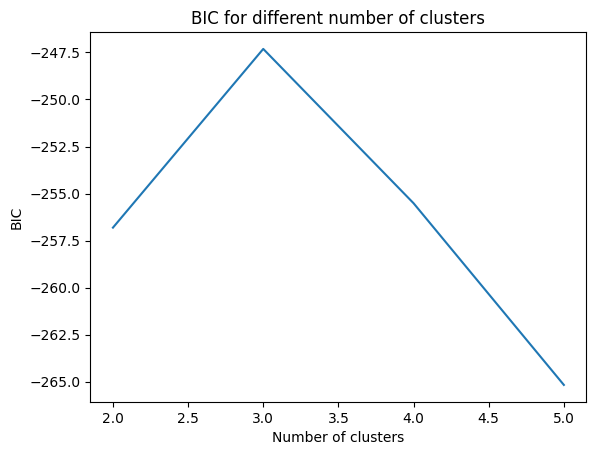

In [21]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="bos")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in tqdm(range(2, 6)):
    # clustering = OrdinalClustering(n_clusters, model="bos", init="random", n_iter=n_iter, eps=eps, silent=True)
    clustering = AECM_BOS(nb_clusters=n_clusters,
                          nb_features=d,
                          ms=m,
                          data=data[0],
                          verbose=False)

    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization="random")

    labels = clustering.labels

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            clustering.alphas, clustering.mus, clustering.pis
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

### GOD

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]
Estimated alpha: [0.85267225 0.14732775], Estimated mu: [[2 1 1]
 [1 1 1]], Estimated pi: [[0.73449171 0.59965803 0.8266688 ]
 [0.9999956  0.60400886 0.80830591]]
LL: -284.8477573976605
BIC: -300.9658530486188
Estimated alpha: [0.57089227 0.23211974 0.19698799], Estimated mu: [[2 1 1]
 [2 2 1]
 [1 3 1]], Estimated pi: [[0.63980811 0.69588585 0.97142471]
 [0.93140592 0.73411587 0.53864356]
 [0.85841494 0.54311401 0.68481411]]
LL: -278.50857873137716
BIC: -303.83701475431167
Estimated alpha: [0.48741691 0.10249308 0.13928248 0.27080754], Estimated mu: [[2 1 1]
 [1 3 2]
 [1 1 1]
 [2 2 1]], Estimated pi: [[0.65006387 0.65367711 0.9999956 ]
 [0.93754262 0.68712476 0.76075188]
 [0.70590157 0.78771922 0.9999956 ]
 [0.9012038  0.70452963 0.5095313 ]]
LL: -276.7325345875238
BIC: -311.2713109824

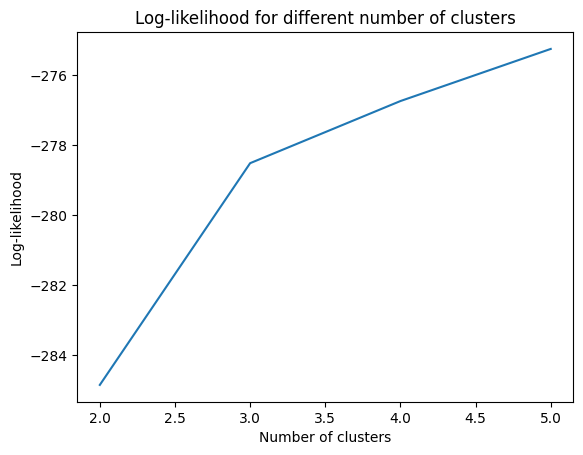

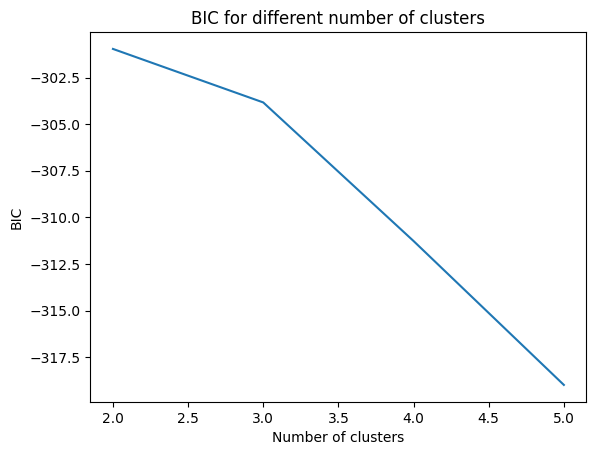

In [22]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in range(2, 6):
    clustering = OrdinalClustering(n_clusters, model="god", init="kmeans", n_iter=n_iter, eps=eps, silent=True)

    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

    labels = clustering.labels_

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            alpha_hat, mu_hat, pi_hat
        )
    )
    print(f"LL: {ll_list[-1]}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()

True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 1 1]
 [2 2 1]
 [1 2 1]], True pi: [[0.69395537 0.83487302 0.96776954]
 [0.92315546 0.65663676 0.76227408]
 [0.72172645 0.61478861 0.76720695]]
Estimated alpha: [0.85256931 0.14743069], Estimated mu: [[2 1 1]
 [1 1 1]], Estimated pi: [[0.73432212 0.59955834 0.82664452]
 [0.99961939 0.60368855 0.80816757]]
LL: -284.84426652587615, -284.84426652587615
BIC: -300.96236217683446
Estimated alpha: [0.57089804 0.23211871 0.19698325], Estimated mu: [[2 1 1]
 [2 2 1]
 [1 3 1]], Estimated pi: [[0.63969041 0.6958017  0.97127066]
 [0.93138971 0.73403666 0.53855941]
 [0.85849909 0.54314159 0.68476894]]
LL: -278.3748671128285, -278.3748671128285
BIC: -303.703303135763
Estimated alpha: [0.48774675 0.10233708 0.13936763 0.27054854], Estimated mu: [[2 1 1]
 [1 3 2]
 [1 1 1]
 [2 2 1]], Estimated pi: [[0.65009873 0.65399254 0.99961939]
 [0.93806339 0.68768289 0.76093717]
 [0.70591685 0.78755834 0.99961939]
 [0.90150618 0.70495343 0.50966689]]
LL:

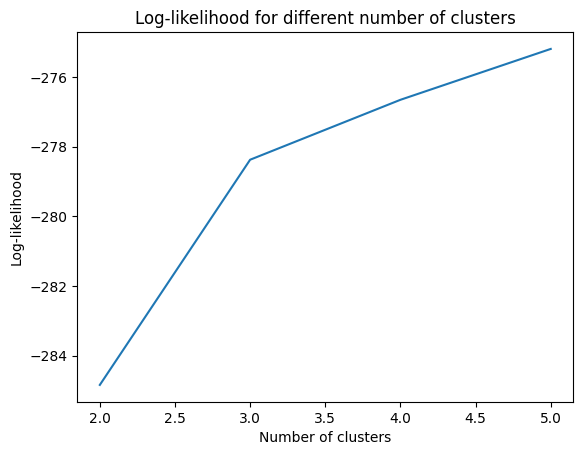

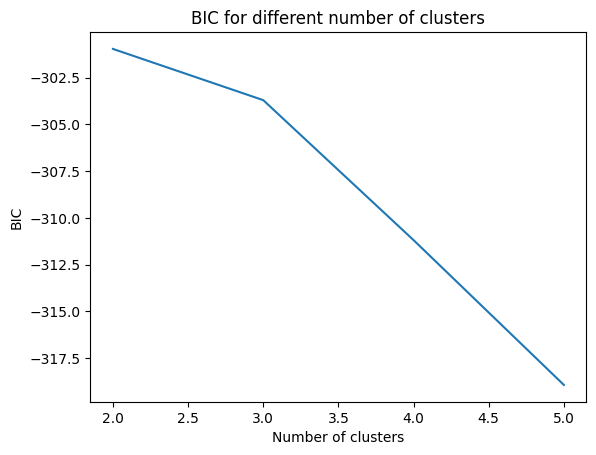

In [23]:
n = 100
d = 3
real_n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-3

np.random.seed(1)
m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (real_n_clusters, d))
true_pi = (np.random.random((real_n_clusters, d)) + 1)/2
true_alpha = np.ones(real_n_clusters) / real_n_clusters

data = generate_data(n, d, m, real_n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)


scores = defaultdict(list)
for n_clusters in range(2, 6):
    # clustering = OrdinalClustering(n_clusters, model="god", init="kmeans", n_iter=n_iter, eps=eps, silent=True)
    clustering = AECM_GOD(nb_clusters=n_clusters,
                          nb_features=d,
                          ms=m,
                          data=data[0],
                          verbose=False)

    # alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)
    ll_list = clustering.fit(epsilon_aecm=eps, max_iter_aecm=n_iter, initialization="kmeans")

    labels = clustering.labels

    print(
        "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
            clustering.alphas, clustering.mus, clustering.pis
        )
    )
    print(f"LL: {ll_list[-1]}, {clustering.log_likelihood}")
    print(f"BIC: {clustering.bic}")

    scores["n_clusters"].append(n_clusters)
    scores["ll"].append(ll_list[-1])
    scores["bic"].append(clustering.bic)

plt.plot(scores["n_clusters"], scores["ll"])
plt.xlabel("Number of clusters")
plt.ylabel("Log-likelihood")
plt.title("Log-likelihood for different number of clusters")
plt.show()

plt.plot(scores["n_clusters"], scores["bic"])
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("BIC for different number of clusters")
plt.show()